Import Dependencies

In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf
import seaborn as sns

In [2]:
pip install -q keras-tuner

In [3]:
import keras_tuner as kt

<b>Data Cleaning</b>

In [4]:
pd.options.display.max_colwidth=300

In [5]:
surveyDF=pd.read_csv("survey_results_public.csv")
surveyDF

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges)",NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);On the job training;Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Online Courses or Certification",Technical documentation;Programming Games;Stack Overflow;Online books;Video-based Online Courses;How-to videos;Written-based Online Courses;Coding sessions (live or recorded);Certification videos,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;O

In [6]:
surveyDF['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [7]:
surveyDF.drop(['MainBranch','ResponseId','LearnCode','LearnCodeOnline','LearnCodeCoursesCert','OrgSize','VersionControlSystem','SurveyEase',
               'SurveyLength','TBranch','ICorPM','Knowledge_1','Knowledge_1','Knowledge_2','Knowledge_3','Knowledge_4','Knowledge_5',
               'Knowledge_6','Knowledge_7','CodingActivities','YearsCode','PurchaseInfluence','BuyNewTool','VersionControlSystem',
               'VCInteraction','VCHostingPersonal use','VCHostingProfessional use','OfficeStackAsyncWantToWorkWith',
               'OfficeStackSyncHaveWorkedWith','Blockchain','SOAccount','SOPartFreq','Frequency_1','Frequency_2',
               'Frequency_3','TimeSearching','TimeAnswering','TrueFalse_1','TrueFalse_2','TrueFalse_3','ConvertedCompYearly',
               'Accessibility','NEWSOSites','SOVisitFreq','SOComm','Onboarding','OfficeStackSyncWantToWorkWith','LanguageWantToWorkWith',
               'WebframeWantToWorkWith','DatabaseWantToWorkWith','NEWCollabToolsWantToWorkWith','PlatformWantToWorkWith',
               'MiscTechWantToWorkWith','ToolsTechWantToWorkWith','Age','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith',
               'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use',
               'OfficeStackAsyncHaveWorkedWith', 'ProfessionalTech'],
              axis=1,inplace=True)
surveyDF.head(10)

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",Fully remote,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN
2,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,Man,No,Bisexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",NaN
3,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,NaN
4,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test",United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN
5,"Student, full-time",NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,Germany,NaN,NaN,NaN,C++;Lua,"Or, in your own words:","Or, in your own words:",Prefer to self-describe:,"Or, in your own words:","Or, in your own words:",NaN
6,"Student, part-time",NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,India,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Man,No,NaN,Indian,None of the above,NaN
7,"Not employed, but looking for work",NaN,Some college/university study without earning a degree,NaN,"Developer, full-stack;Student",India,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;SQL,Man,No,Straight / Heterosexual,Indian,None of the above,NaN
8,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",Netherlands,EUR European Euro,46000.0,Yearly,NaN,Woman,No,Prefer to self-describe:,European,"Or, in your own words:",6.0
9,"Independent contractor, freelancer, or self-employed",Fully remote,Some college/university study without earning a degree,30,"Developer, desktop or enterprise applications;Developer, mobile;Educator",Croatia,HRK\tCroatian kuna,NaN,NaN,Delphi;Java;Swift,Woman,No,Straight / Heterosexual,White;European,None of the above,NaN


In [8]:
surveyDF.dropna(how=("any"),inplace=True)
surveyDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
11,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
12,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
14,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
21,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
22,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73254,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
73258,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
73259,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
73263,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [9]:
newDF=surveyDF.reset_index(drop=True)
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25308,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
25309,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
25310,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
25311,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [10]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25313 entries, 0 to 25312
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employment              25313 non-null  object 
 1   RemoteWork              25313 non-null  object 
 2   EdLevel                 25313 non-null  object 
 3   YearsCodePro            25313 non-null  object 
 4   DevType                 25313 non-null  object 
 5   Country                 25313 non-null  object 
 6   Currency                25313 non-null  object 
 7   CompTotal               25313 non-null  float64
 8   CompFreq                25313 non-null  object 
 9   LanguageHaveWorkedWith  25313 non-null  object 
 10  Gender                  25313 non-null  object 
 11  Trans                   25313 non-null  object 
 12  Sexuality               25313 non-null  object 
 13  Ethnicity               25313 non-null  object 
 14  MentalHealth            25313 non-null

In [11]:
newDF["WorkExp"].astype("float")

0        14.0
1         5.0
2         5.0
3         4.0
4        23.0
         ... 
25308    16.0
25309     1.0
25310     2.0
25311     5.0
25312     6.0
Name: WorkExp, Length: 25313, dtype: float64

In [12]:
newDF["YearsCodePro"]=newDF["YearsCodePro"].str.replace("Less than 1 year","1")
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25308,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
25309,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
25310,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
25311,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [13]:
newDF = newDF[newDF["YearsCodePro"]!="More than 50 years"]

In [14]:
newDF["YearsCodePro"].astype("float")

0        10.0
1         5.0
2         5.0
3         4.0
4        20.0
         ... 
25308     6.0
25309     1.0
25310     2.0
25311     5.0
25312     5.0
Name: YearsCodePro, Length: 25310, dtype: float64

In [15]:
newDF['Employment'].value_counts()

Employed, full-time                                                                             21559
Employed, full-time;Independent contractor, freelancer, or self-employed                         1987
Independent contractor, freelancer, or self-employed                                             1042
Employed, part-time                                                                               397
Independent contractor, freelancer, or self-employed;Employed, part-time                          124
Employed, full-time;Employed, part-time                                                           106
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time       91
Employed, part-time;Retired                                                                         2
Employed, full-time;Retired                                                                         1
Employed, full-time;Independent contractor, freelancer, or self-employed;Retired  

In [16]:
# keep only 1. Employed, full-time 2. Employed, part-time 3. Independent contractor, freelancer, or self-employed to ensure only 1 source of income is being reported
employment_values = ['Employed, full-time', 'Employed, part-time', 'Independent contractor, freelancer, or self-employed']
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

newDF = filter_rows_by_values(newDF, "Employment", values=employment_values)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR European Euro,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD\tUnited States dollar,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0


In [17]:
newDF['Employment'].value_counts() # check for changes

Employed, full-time                                     21559
Independent contractor, freelancer, or self-employed     1042
Employed, part-time                                       397
Name: Employment, dtype: int64

In [18]:
newDF['Gender'].value_counts()

Man                                                                                   21215
Woman                                                                                  1139
Non-binary, genderqueer, or gender non-conforming                                       205
Prefer not to say                                                                       198
Man;Non-binary, genderqueer, or gender non-conforming                                    71
Or, in your own words:                                                                   61
Woman;Non-binary, genderqueer, or gender non-conforming                                  52
Man;Or, in your own words:                                                               38
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  6
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming            4
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [19]:
# keep entries with only 1 answer
gender_values=['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
newDF = filter_rows_by_values(newDF, "Gender", values=gender_values)
newDF['Gender'].value_counts() # check for changes

Man                                                  21215
Woman                                                 1139
Non-binary, genderqueer, or gender non-conforming      205
Name: Gender, dtype: int64

In [20]:
currencies = newDF["Currency"].unique()
currencies

array(['USD\tUnited States dollar', 'EUR European Euro',
       'CAD\tCanadian dollar', 'PLN\tPolish zloty',
       'ILS\tIsraeli new shekel', 'NOK\tNorwegian krone',
       'BRL\tBrazilian real', 'UYU\tUruguayan peso',
       'GBP\tPound sterling', 'SEK\tSwedish krona', 'INR\tIndian rupee',
       'CZK\tCzech koruna', 'KES\tKenyan shilling',
       'ZAR\tSouth African rand', 'CNY\tChinese Yuan Renminbi',
       'DKK\tDanish krone', 'AUD\tAustralian dollar',
       'VND\tVietnamese dong', 'ARS\tArgentine peso',
       'HUF\tHungarian forint', 'TND\tTunisian dinar', 'CHF\tSwiss franc',
       'BDT\tBangladeshi taka', 'MVR\tMaldivian rufiyaa',
       'THB\tThai baht', 'HKD\tHong Kong dollar', 'MXN\tMexican peso',
       'RSD\tSerbian dinar', 'HRK\tCroatian kuna',
       'BAM\tBosnia and Herzegovina convertible mark', 'IMP\tManx pound',
       'IRR\tIranian rial', 'TRY\tTurkish lira', 'RUB\tRussian ruble',
       'CRC\tCosta Rican colon', 'KZT\tKazakhstani tenge',
       'MAD\tMoroccan di

In [21]:
# get currency codes
currency_codes=[]
for c in currencies:
  currency_codes.append(c[0:3])
  # replace "Currency" column with currency codes
  newDF.loc[newDF["Currency"]==c, "Currency"] = c[0:3]
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0


In [22]:
# get currency exchange rates from May 24, 2022 to match methodology of original survey analysis
url = 'https://api.currencyapi.com/v3/historical?apikey=2dZBW01p3MVzbNmoHXdBpLU7nroSBsA0U9hPU4A2&currencies=&date=2022-05-24'
conversions = requests.get(url).json()
# save conversion rates in a df
conversion_rates_df = pd.DataFrame(conversions['data'].values())
conversion_rates_df

,code,value
0,AED,3.673160
1,AFN,89.502630
2,ALL,112.878030
3,AMD,452.708330
4,ANG,1.803370
...,...,...
148,YER,250.257430
149,ZAR,15.652040
150,ZMK,9001.200000
151,ZMW,17.160400


In [23]:
for c in currency_codes:
  # grab value from conversion rates df
  value = conversion_rates_df["value"].loc[conversion_rates_df["code"]==c].median()
  # print(c, value)
  # add value to newDF
  newDF.loc[newDF["Currency"]==c, "ConversionRates"] = value
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000


In [24]:
# add column 'ConvertedComp' by dividing CompTotal by ConversionRates
newDF['ConvertedComp'] = (newDF['CompTotal'] / newDF['ConversionRates']).round(decimals=2)
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates,ConvertedComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000,130000.00


In [25]:
# calculate yearly compensation assuming 12 working months and 50 working weeks
def yearly_compensation(frequency, amount):
  if frequency=='Monthly':
    return amount*12
  elif frequency=='Weekly':
    return amount*50
  else:
    return amount

newDF['YearlyComp'] = np.vectorize(yearly_compensation)(frequency=newDF['CompFreq'], amount=newDF['ConvertedComp'])
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates,ConvertedComp,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000,65000.00,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156,34350.98,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233,97478.81,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156,91244.79,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000,130000.00,130000.00


In [26]:
# drop Currency, CompTotal, CompFreq, ConversionRates, and ConvertedComp - not needed anymore
newDF.drop(['Currency', 'CompTotal', 'CompFreq', 'ConversionRates', 'ConvertedComp'], axis=1, inplace=True)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,130000.00


In [27]:
newDF.to_csv("cleanedSurvey.csv", index=False) # save a clean version of data without index

<b> Data Preprocessing </b>

In [28]:
#  Import and read the cleaned data
clean_df = pd.read_csv("cleanedSurvey.csv")
clean_df.count()

Employment                22559
RemoteWork                22559
EdLevel                   22559
YearsCodePro              22559
DevType                   22559
Country                   22559
LanguageHaveWorkedWith    22559
Gender                    22559
Trans                     22559
Sexuality                 22559
Ethnicity                 22559
MentalHealth              22559
WorkExp                   22559
YearlyComp                22543
dtype: int64

Additional Data Cleaning for Tableau Visualizations

In [29]:
# create a function to separate the columns into multiple columns instead.
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # break each value into list of options
        for option in value.split(';'):
            # add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0
            # mark the value in the option column as True
            result_df.at[idx, option] = 1
    return result_df[options]

dev_type_df = split_multicolumn(clean_df['DevType'])
dev_type_df.columns

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, mobile',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Developer, game or graphics',
       'Data scientist or machine learning specialist', 'Engineer, data',
       'Developer, front-end', 'DevOps specialist',
       'Cloud infrastructure engineer', 'Student', 'Engineering manager',
       'Database administrator', 'Project manager', 'Designer',
       'Product manager', 'Senior Executive (C-Suite, VP, etc.)',
       'System administrator', 'Developer, QA or test',
       'Marketing or sales professional', 'Data or business analyst',
       'Security professional', 'Other (please specify):',
       'Engineer, site reliability', 'Scientist', 'Academic researcher',
       'Educator', 'Blockchain'],
      dtype='object')

In [30]:
# rename
dev_type_df.rename(columns={"Other (please specify)": "DevType Other"}, inplace=True)
# save df
dev_type_df.to_csv("dev_type.csv")

In [31]:
# do the same for languages
language_df=split_multicolumn(clean_df['LanguageHaveWorkedWith'])
language_df.columns

Index(['C', 'HTML/CSS', 'Rust', 'SQL', 'Swift', 'TypeScript', 'Python', 'C#',
       'Dart', 'Go', 'Java', 'Kotlin', 'C++', 'JavaScript', 'Bash/Shell',
       'PHP', 'Haskell', 'LISP', 'PowerShell', 'Assembly', 'Delphi', 'Clojure',
       'Ruby', 'Groovy', 'R', 'VBA', 'Crystal', 'Scala', 'Lua', 'Perl', 'SAS',
       'Erlang', 'Objective-C', 'MATLAB', 'F#', 'APL', 'Elixir', 'OCaml',
       'COBOL', 'Solidity', 'Julia', 'Fortran'],
      dtype='object')

In [32]:
# save df
language_df.to_csv("language.csv")

Data Preprocessing for Machine Learning

In [33]:
clean_df.drop(columns=['LanguageHaveWorkedWith','DevType', 'Sexuality',	'Ethnicity',	'MentalHealth'], axis=1, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,United States of America,Man,No,5.0,65000.00
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Italy,Man,No,4.0,34350.98
2,"Employed, full-time",Fully remote,Something else,20,Canada,Man,No,23.0,97478.81
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,Germany,Man,No,9.0,91244.79
4,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,United States of America,Man,No,14.0,130000.00


In [41]:
# countries present too many nominal variable but location is important so we will change them to continents
countries = clean_df['Country'].unique().tolist()
clean_df = clean_df[clean_df.Country != "Nomadic"] # removing invalid entry
countries = clean_df['Country'].unique().tolist() # rewrite list

In [35]:
pip install -q pycountry-convert

In [42]:
# replace country names identified as invalid by pycountry
new_countries = list(map(lambda x: x.replace('Hong Kong (S.A.R.)', 'China'), countries))
new_countries = list(map(lambda x: x.replace('Iran, Islamic Republic of...', 'Iran'), new_countries))
new_countries = list(map(lambda x: x.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia'), new_countries))
new_countries = list(map(lambda x: x.replace('Republic of Korea', 'South Korea'), new_countries))
new_countries = list(map(lambda x: x.replace('Venezuela, Bolivarian Republic of...', 'Venezuela'), new_countries))
new_countries = list(map(lambda x: x.replace('Libyan Arab Jamahiriya', 'Libya'), new_countries))

In [43]:
# import dependency
import pycountry_convert as pc

# create function to get continent names to replace country names
def country_to_continent(country_name):
    if country_name == 'Kosovo': # added to avoid error
      country_continent_name = 'Europe'
    else:
      country_code = pc.country_name_to_country_alpha2(country_name)
      if country_code == 'TL': # added to avoid error
        country_continent_name = "Asia"
      else:
        country_continent_code = pc.country_alpha2_to_continent_code(country_code)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [44]:
# replace countries with new countries by creating a dictionary
country_dictionary = {countries[i]: new_countries[i] for i in range(len(countries))}
country_dictionary

{'United States of America': 'United States of America',
 'Italy': 'Italy',
 'Canada': 'Canada',
 'Germany': 'Germany',
 'Poland': 'Poland',
 'Israel': 'Israel',
 'Madagascar': 'Madagascar',
 'Norway': 'Norway',
 'Netherlands': 'Netherlands',
 'Brazil': 'Brazil',
 'Uruguay': 'Uruguay',
 'France': 'France',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland',
 'Spain': 'Spain',
 'Sweden': 'Sweden',
 'India': 'India',
 'Ireland': 'Ireland',
 'Greece': 'Greece',
 'Portugal': 'Portugal',
 'Czech Republic': 'Czech Republic',
 'Kenya': 'Kenya',
 'Latvia': 'Latvia',
 'Austria': 'Austria',
 'South Africa': 'South Africa',
 'China': 'China',
 'Slovakia': 'Slovakia',
 'Denmark': 'Denmark',
 'Australia': 'Australia',
 'Viet Nam': 'Viet Nam',
 'Finland': 'Finland',
 'Argentina': 'Argentina',
 'Hungary': 'Hungary',
 'Tunisia': 'Tunisia',
 'Switzerland': 'Switzerland',
 'Bangladesh': 'Bangladesh',
 'Ukraine': 'Ukraine',
 'Maldives': 'Maldiv

In [45]:
# encode Employment, RemoteWork, EdLevel, Gender, and Trans and fix country names
replacements = {"Employment": {"Employed, part-time": 1, "Employed, full-time": 2,"Independent contractor, freelancer, or self-employed":3},
                "RemoteWork":{"Full in-person": 1, "Hybrid (some remote, some in-person)": 2, "Fully remote": 3},
                "EdLevel": {"Primary/elementary school": 1, "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : 2,
                            "Some college/university study without earning a degree": 3, "Associate degree (A.A., A.S., etc.)": 4,
                            "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 5, "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 6,
                            "Professional degree (JD, MD, etc.)": 7, "Other doctoral degree (Ph.D., Ed.D., etc.)": 8,"Something else": 9},
                "Gender": {"Man": 3, "Woman": 2, "Non-binary, genderqueer, or gender non-conforming": 1},
                "Trans": {"No": 1, "Yes": 2, "Prefer not to say": 3, "Or, in your own words:": 4},
                "Country": country_dictionary
                }
clean_df.replace(replacements, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
0,2,2,5,5,United States of America,3,1,5.0,65000.00
1,2,2,6,4,Italy,3,1,4.0,34350.98
2,2,3,9,20,Canada,3,1,23.0,97478.81
3,2,2,6,9,Germany,3,1,9.0,91244.79
4,2,2,6,14,United States of America,3,1,14.0,130000.00


In [46]:
# get continent names
continents = []
for c in new_countries:
  continents.append(country_to_continent(c))

continents

['North America',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Asia',
 'Africa',
 'Europe',
 'Europe',
 'South America',
 'South America',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'Europe',
 'Africa',
 'Asia',
 'Europe',
 'Europe',
 'Oceania',
 'Asia',
 'Europe',
 'South America',
 'Europe',
 'Africa',
 'Europe',
 'Asia',
 'Europe',
 'Asia',
 'Asia',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Asia',
 'Europe',
 'North America',
 'Europe',
 'Asia',
 'Africa',
 'Europe',
 'Oceania',
 'South America',
 'Europe',
 'Asia',
 'South America',
 'Asia',
 'Asia',
 'Asia',
 'South America',
 'Asia',
 'Africa',
 'North America',
 'South America',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Europe',
 'Africa',
 'Asia',
 'Africa',
 'Asia',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Asia',
 'Oceania',
 'Asia',
 'Asia',
 'Asi

In [47]:
# replace new countries with continents by creating a dictionary
continent_dictionary = {new_countries[i]: continents[i] for i in range(len(new_countries))}
# replace country names with continent names
new_replacement = {"Country":continent_dictionary}
clean_df.replace(new_replacement, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
0,2,2,5,5,North America,3,1,5.0,65000.00
1,2,2,6,4,Europe,3,1,4.0,34350.98
2,2,3,9,20,North America,3,1,23.0,97478.81
3,2,2,6,9,Europe,3,1,9.0,91244.79
4,2,2,6,14,North America,3,1,14.0,130000.00


In [48]:
clean_df.rename(columns={'Country': 'Continent'}, inplace=True)
clean_df

,Employment,RemoteWork,EdLevel,YearsCodePro,Continent,Gender,Trans,WorkExp,YearlyComp
0,2,2,5,5,North America,3,1,5.0,65000.00
1,2,2,6,4,Europe,3,1,4.0,34350.98
2,2,3,9,20,North America,3,1,23.0,97478.81
3,2,2,6,9,Europe,3,1,9.0,91244.79
4,2,2,6,14,North America,3,1,14.0,130000.00
...,...,...,...,...,...,...,...,...,...
22554,2,2,6,6,North America,3,1,16.0,115000.00
22555,2,2,5,1,Asia,3,1,1.0,41300.67
22556,2,2,6,2,Europe,3,1,2.0,22414.68
22557,2,3,5,5,Africa,3,1,5.0,60000.00


In [49]:
continent_df = pd.get_dummies(clean_df)
continent_df

,Employment,RemoteWork,EdLevel,YearsCodePro,Gender,Trans,WorkExp,YearlyComp,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2,2,5,5,3,1,5.0,65000.00,0,0,0,1,0,0
1,2,2,6,4,3,1,4.0,34350.98,0,0,1,0,0,0
2,2,3,9,20,3,1,23.0,97478.81,0,0,0,1,0,0
3,2,2,6,9,3,1,9.0,91244.79,0,0,1,0,0,0
4,2,2,6,14,3,1,14.0,130000.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,2,2,6,6,3,1,16.0,115000.00,0,0,0,1,0,0
22555,2,2,5,1,3,1,1.0,41300.67,0,1,0,0,0,0
22556,2,2,6,2,3,1,2.0,22414.68,0,0,1,0,0,0
22557,2,3,5,5,3,1,5.0,60000.00,1,0,0,0,0,0


In [50]:
continent_df.dropna(inplace=True) # get rid of null values due to missing currency conversions
continent_df = continent_df.loc[continent_df["YearlyComp"]<1000000] # dropped all reports of salary over $1,000,000 to get rid of outliers

In [77]:
continent_df

,Employment,RemoteWork,EdLevel,YearsCodePro,Gender,Trans,WorkExp,YearlyComp,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2,2,5,5,3,1,5.0,65000.00,0,0,0,1,0,0
1,2,2,6,4,3,1,4.0,34350.98,0,0,1,0,0,0
2,2,3,9,20,3,1,23.0,97478.81,0,0,0,1,0,0
3,2,2,6,9,3,1,9.0,91244.79,0,0,1,0,0,0
4,2,2,6,14,3,1,14.0,130000.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,2,2,6,6,3,1,16.0,115000.00,0,0,0,1,0,0
22555,2,2,5,1,3,1,1.0,41300.67,0,1,0,0,0,0
22556,2,2,6,2,3,1,2.0,22414.68,0,0,1,0,0,0
22557,2,3,5,5,3,1,5.0,60000.00,1,0,0,0,0,0


**Machine Learning**

Looking at the Data

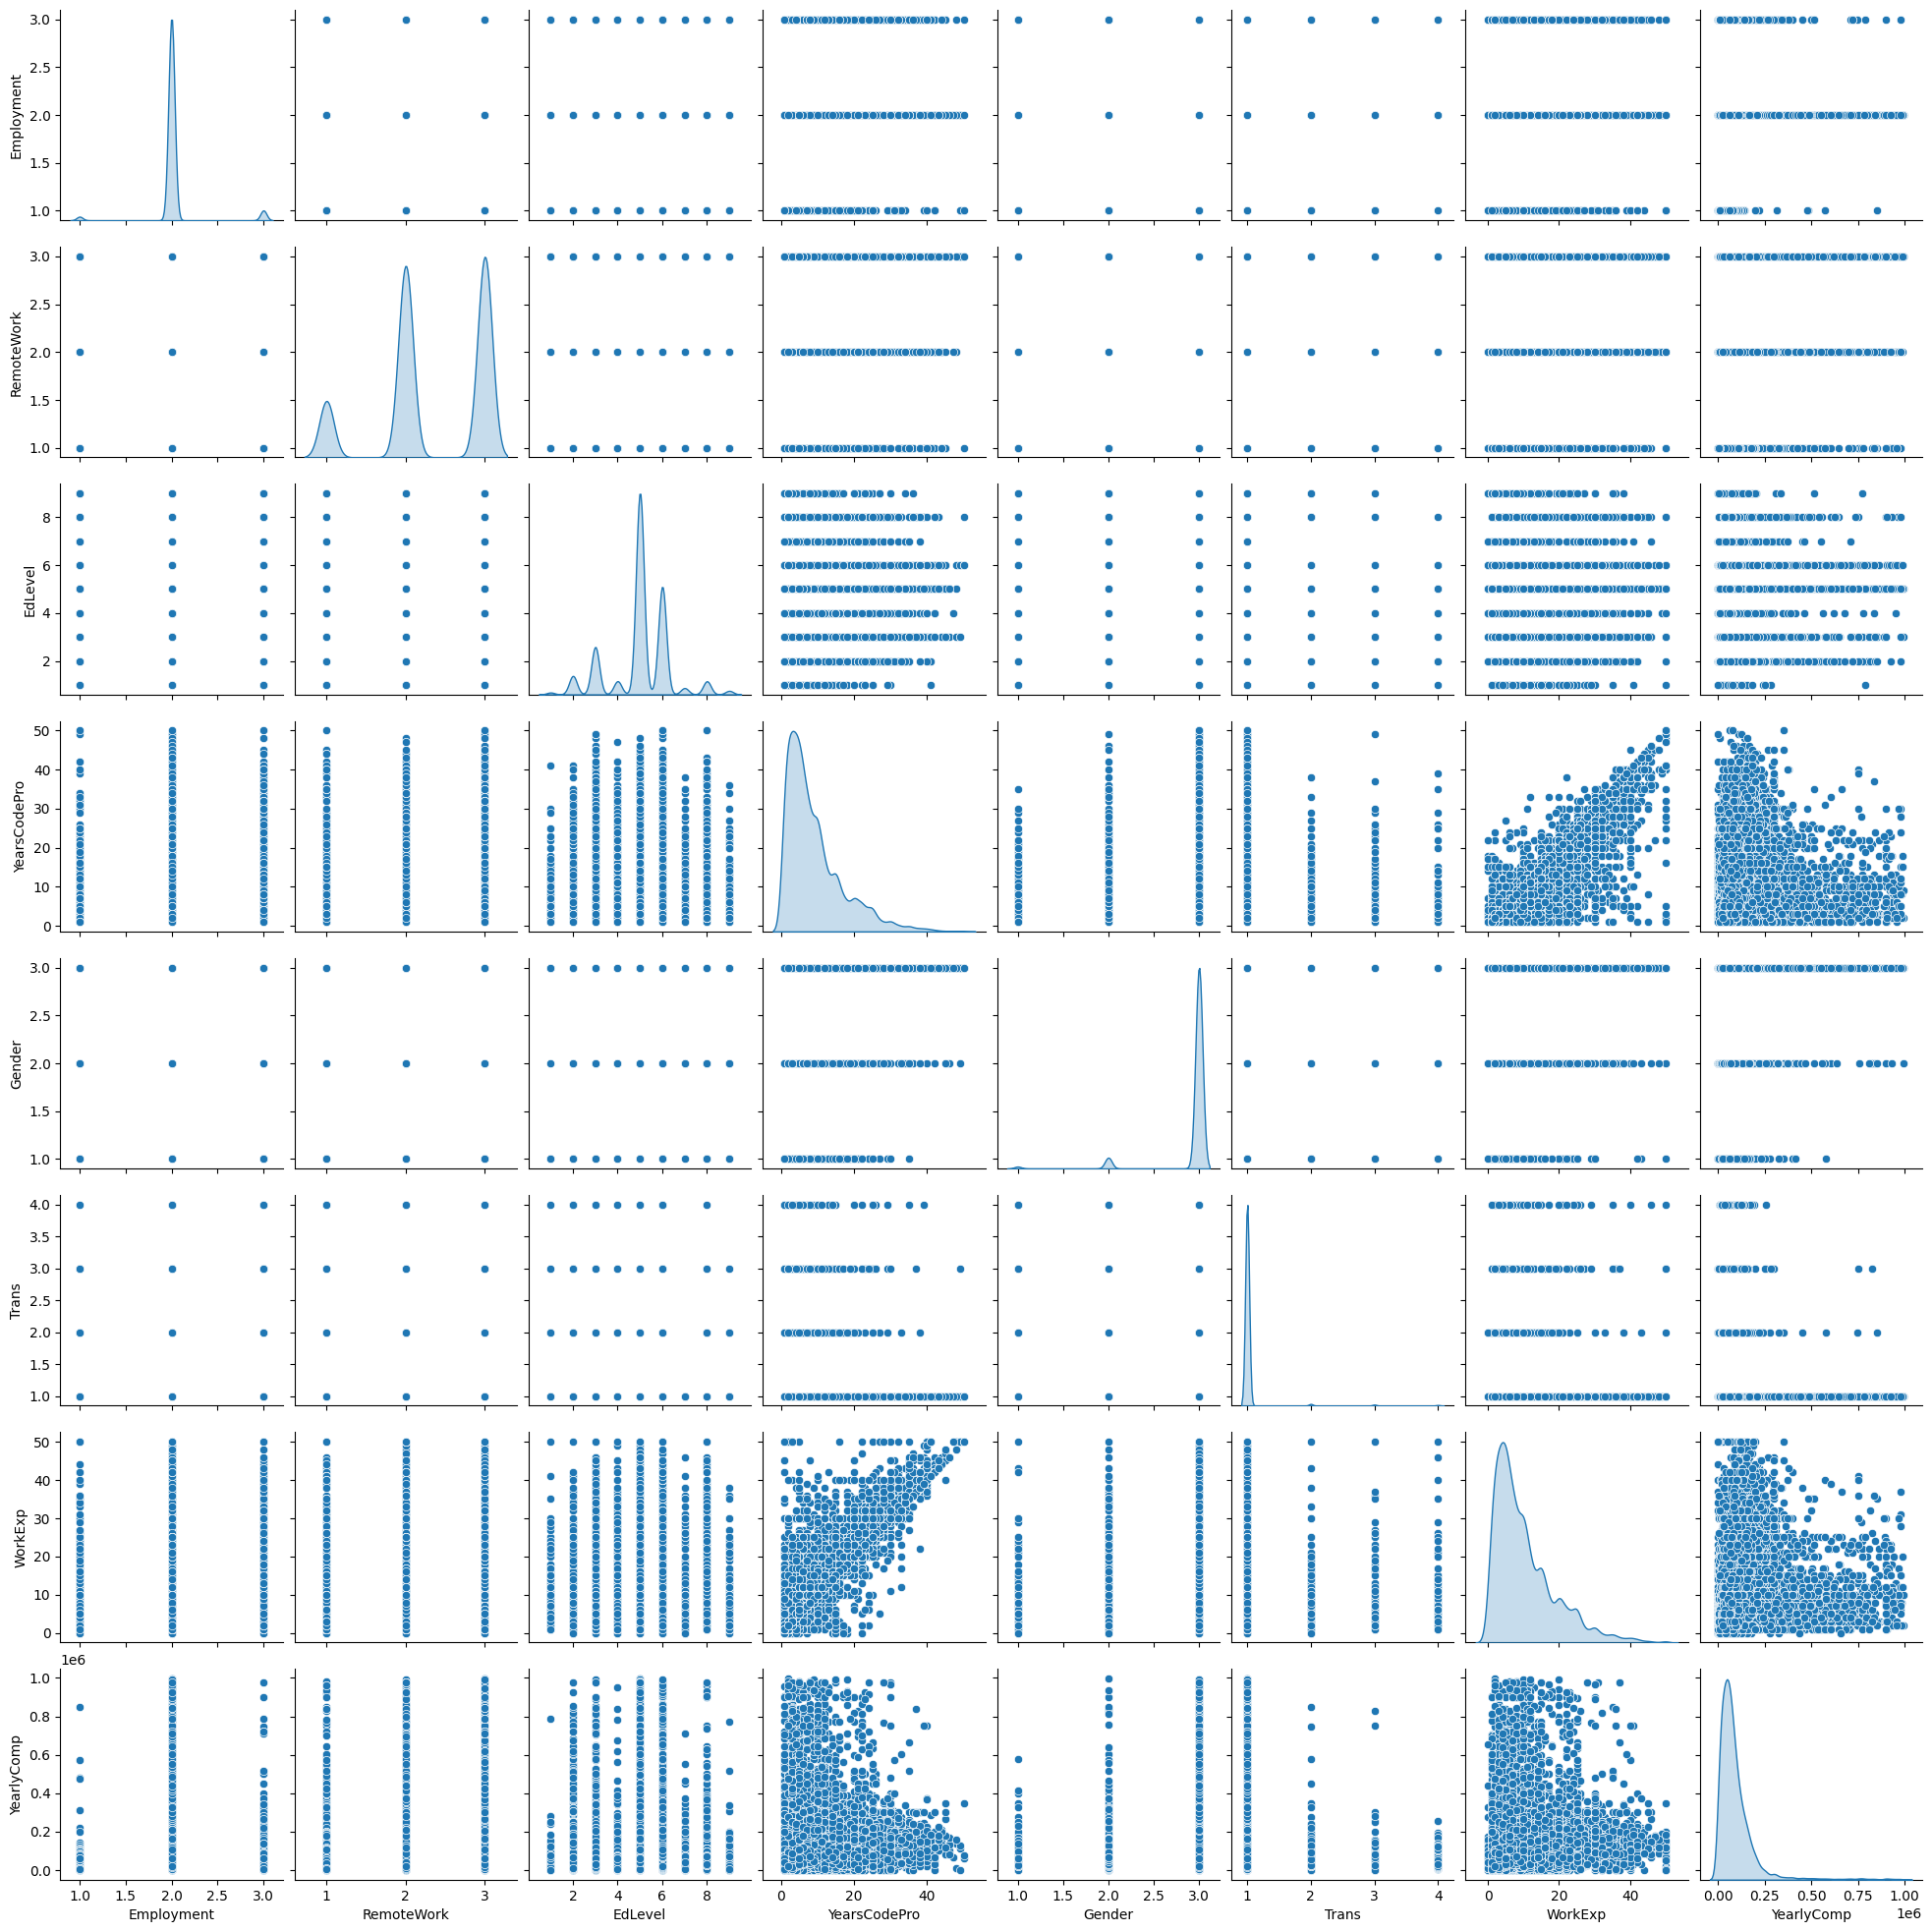

In [52]:
sns.pairplot(data=continent_df[["Employment",	"RemoteWork",	"EdLevel",
                                "YearsCodePro",	"Gender",	"Trans",	"WorkExp",
                                "YearlyComp"]], diag_kind='kde') # to see distribution of data

In [53]:
plt.savefig("pairplot.png") # save it

<Figure size 640x480 with 0 Axes>

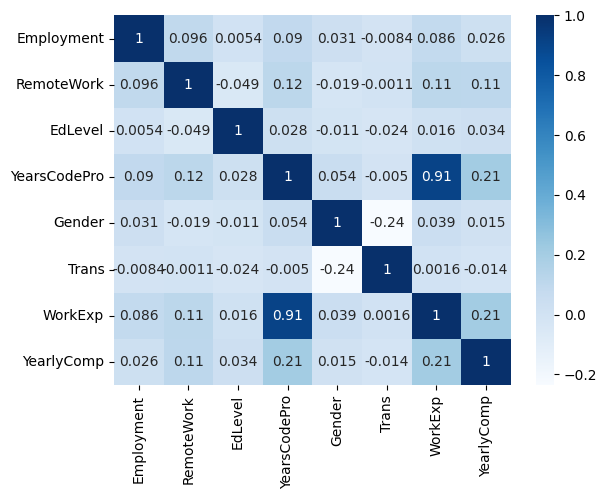

In [54]:
# sns heatmap for correlation
sns.heatmap(continent_df[["Employment",	"RemoteWork",	"EdLevel",
                                "YearsCodePro",	"Gender",	"Trans",	"WorkExp",
                                "YearlyComp"]].corr(), cmap='Blues', annot=True)
plt.show()

In [55]:
plt.savefig("heatmap.png") # save it

<Figure size 640x480 with 0 Axes>

First Attempt

In [56]:
X = continent_df.drop(columns=['YearlyComp'], axis=1)
y = continent_df['YearlyComp'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model.fit(X_train, Y_train)

# prediction on Training data
Y_pred = lin_reg_model.predict(X_test)

# R squared Error
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.12581609156350138


In [59]:
lin_reg_model.score(X_test, Y_test)

0.12581609156350138

In [60]:
# use mean_squared_error
mse = round(metrics.mean_squared_error(Y_test, Y_pred))

# calculate the root mean squared error - standard deviation of errors
rmse = round(np.sqrt(mse), 5)

# standar deviation of y
std = round(np.std(y), 5)

print(f"RMSE: {rmse}")
print(f"Std. Dev: {std}")

RMSE: 108875.69719
Std. Dev: 111837.37456


Second Attempt: Drop Trans to see if model improves

In [61]:
df2 = continent_df.drop(columns=["Trans"], axis=1)
df2.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Gender,WorkExp,YearlyComp,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2,2,5,5,3,5.0,65000.00,0,0,0,1,0,0
1,2,2,6,4,3,4.0,34350.98,0,0,1,0,0,0
2,2,3,9,20,3,23.0,97478.81,0,0,0,1,0,0
3,2,2,6,9,3,9.0,91244.79,0,0,1,0,0,0
4,2,2,6,14,3,14.0,130000.00,0,0,0,1,0,0


In [62]:
# Split dataset
X2 = df2.drop(['YearlyComp'], axis=1)
y2 = df2['YearlyComp'].values.reshape(-1,1)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, random_state=42)

In [63]:
# loading the linear regression model
lin_reg_model2 = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model2.fit(X_train2, Y_train2)

LinearRegression()

In [64]:
# prediction on Training data
Y_pred2 = lin_reg_model2.predict(X_test2)

In [65]:
# R squared Error
test_error_score2 = metrics.r2_score(Y_test2, Y_pred2)
print("R squared Error - Test: ", test_error_score2)

R squared Error - Test:  0.12567399260042655


In [66]:
# use mean_squared_error
mse2 = round(metrics.mean_squared_error(Y_test2, Y_pred2))

# calculate the root mean squared error - standard deviation of errors
rmse2 = round(np.sqrt(mse2), 5)

# standar deviation of y2
std2 = round(np.std(y2), 5)

print(f"RMSE: {rmse2}")
print(f"Std. Dev: {std2}")

RMSE: 108884.54573
Std. Dev: 111837.37456


Third Attempt: Drop YearsCodePro (heavily skewed and highly correlated with WorkExp) to see if model improves

In [67]:
df3 = continent_df.drop(columns=["YearsCodePro"], axis=1)
df3.head()

,Employment,RemoteWork,EdLevel,Gender,Trans,WorkExp,YearlyComp,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2,2,5,3,1,5.0,65000.00,0,0,0,1,0,0
1,2,2,6,3,1,4.0,34350.98,0,0,1,0,0,0
2,2,3,9,3,1,23.0,97478.81,0,0,0,1,0,0
3,2,2,6,3,1,9.0,91244.79,0,0,1,0,0,0
4,2,2,6,3,1,14.0,130000.00,0,0,0,1,0,0


In [68]:
# Split dataset
X3 = df3.drop(['YearlyComp'], axis=1)
y3 = df3['YearlyComp'].values.reshape(-1,1)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, y3, random_state=42)

# loading the linear regression model
lin_reg_model3 = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model3.fit(X_train3, Y_train3)

# prediction on Training data
Y_pred3 = lin_reg_model3.predict(X_test3)

# R squared Error
test_error_score3 = metrics.r2_score(Y_test3, Y_pred3)
print("R squared Error - Test: ", test_error_score3)

R squared Error - Test:  0.12430002190921807


In [69]:
# use mean_squared_error
mse3 = round(metrics.mean_squared_error(Y_test3, Y_pred3))

# calculate the root mean squared error - standard deviation of errors
rmse3 = round(np.sqrt(mse3), 5)

# standar deviation of y3
std3 = round(np.std(y3), 5)

print(f"RMSE: {rmse3}")
print(f"Std. Dev: {std3}")

RMSE: 108970.06614
Std. Dev: 111837.37456


Fourth Attempt

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

X4 = continent_df.drop(['YearlyComp'], axis=1)
y4 = continent_df['YearlyComp'].values.reshape(-1,1)

#Split test and train data
X_train4, X_test4, y_train4, y_test4=train_test_split(X4,y4, random_state=42)
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train4, y_train4)
y_pred4 = regr_trans.predict(X_test4)
round(metrics.r2_score(y_test4, y_pred4), 3), round(metrics.mean_absolute_error(y_test4, y_pred4), 2), round(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)),2)

(-0.185, 56154.05, 126743.84)

Fifth Attempt

In [74]:
# Drop Employment, EdLevel, Trans, and Gender

df5 = continent_df.drop(columns=['Employment', 'EdLevel', 'Trans', 'Gender'], axis=1)

# Split dataset
X5 = df5.drop(['YearlyComp'], axis=1)
y5 = df5['YearlyComp'].values.reshape(-1,1)

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, y5, random_state=42)

# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model.fit(X_train5, Y_train5)

# prediction on Training data
Y_pred5 = lin_reg_model.predict(X_test5)

# R squared Error
test_error_score = metrics.r2_score(Y_test5, Y_pred5)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.12394276642616553


In [75]:
# use mean_squared_error
mse = round(metrics.mean_squared_error(Y_test5, Y_pred5))

# calculate the root mean squared error - standard deviation of errors
rmse = round(np.sqrt(mse), 5)

# standar deviation of y
std = round(np.std(y5), 5)

print(f"RMSE: {rmse}")
print(f"Std. Dev: {std}")

RMSE: 108992.2919
Std. Dev: 111837.37456


Optimization Attempt

In [76]:
def custom_loss_function(Y_train, Y_pred):
   squared_difference = tf.square(Y_train - Y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

In [83]:
def make_model(hp): # hyperparameters that will be passed in from a Hyperband tuner variable

  # set up the sequential model
  nn_model = tf.keras.models.Sequential()

  # set up choices for the activation functions to be used in the hidden layers
  activation_list = hp.Choice('activation', ['relu', 'tanh', 'sigmoid']) # Choice function: we have an attribute called activation so loop through these choices when it's time

  # set up the keras tuner to decide (loop) through a number of attributes in the first layer - input_dim = 13 - loop through 1 - 25 neurons on the second layer
  nn_model.add(
      tf.keras.layers.Dense(
          input_dim=13,
          activation=activation_list,
          units=hp.Int('first_units', min_value=1, max_value=25) # this will loop through 1 - 25
      )
  )

  # set up the keras tuner to test different number of hidden layers as well as neurons on those hidden layers
  for num in range(hp.Int('num_layers', 1, 6)):

    # add the layer (or layers) with a neuron (or neurons) on each layer
    nn_model.add(
        tf.keras.layers.Dense(
            activation=activation_list,
            units=hp.Int(
                'units_' + str(num),
                min_value=1,
                max_value=25
                )
        )

    )

  # set up the output layer (1 node)
  nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # compile the model
  nn_model.compile(loss=custom_loss_function, optimizer='adam', metrics=['accuracy'])

  # return the model to be used in the iteration
  return nn_model

In [84]:
# use the Hyperband function in order to run the optimizer function
tuner_model = kt.Hyperband(
    # pass in the function that contains the attributes
    make_model,
    # pass in the val_accuracy objective function
    objective = 'val_accuracy', # tries to find the highest accuracy of the combination of hyperparameters
    # tell the max_epochs
    max_epochs = 25, # lower number so it doesn't take forever
    # tell the number of hyperband iterations
    hyperband_iterations=2
)

In [85]:
# use the .search() from keras tuner to search for the best combination of hyperparameters # same train and test set as model 1
tuner_model.search(X_train, Y_train, epochs=25, validation_data=[X_test, Y_test])

Trial 56 Complete [00h 01m 25s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 22m 57s


In [86]:
# use .get_best_hyperparameters

tuner_model.get_best_hyperparameters(1)[0].values

{'activation': 'tanh',
 'first_units': 22,
 'num_layers': 4,
 'units_0': 11,
 'units_1': 11,
 'units_2': 20,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0,
 'units_3': 1}